In [1]:
from nomad import config
# this will not be necessary, once this is the official NOMAD version
config.client.url = 'http://labdev-nomad.esc.rzg.mpg.de/fairdi/nomad/testing-major/api'

In [2]:
import matplotlib.pyplot as plt

from nomad.client import query_archive
from nomad.metainfo import units

In [3]:
aq = query_archive(
    query={
        'upload_id': ['b5rGMO6dT4Gzqn3JaLjPpw']
    },
    required={
        'section_run': {
            'section_single_configuration_calculation[0]': {
                'energy_total': '*'
            }          
        }
    }, 
    per_page=100, max=1000)

print('total', aq.total)

for i, e in enumerate(aq):
    if i % 200 == 0:
        print(e.section_run[0].section_single_configuration_calculation[0].energy_total)
        
print(aq)

total 2398
-4.506215193227115e-18 joule
-5.8515279132483456e-18 joule
-4.251737530685669e-18 joule
-3.2217721980540896e-18 joule
-4.437416946700958e-18 joule
Number queries entries: 2398
Number of entries loaded in the last api call: 100
Bytes loaded in the last api call: 34531
Bytes loaded from this query: 345235
Number of downloaded entries: 1000
Number of made api calls: 10



In [4]:
aq[0].m_to_dict()

{'section_run': [{'section_single_configuration_calculation': [{'energy_total': -4.506215193227115e-18}]}]}

In [5]:
aq = query_archive(
    query={
        'dft.quantities': ['section_dos']
    },
    per_page=1)
entry = aq[0]

In [6]:
run = entry.section_run[0]
dos = next(
    scc.section_dos[0] 
    for scc in run.section_single_configuration_calculation
    if len(scc.section_dos) > 0)

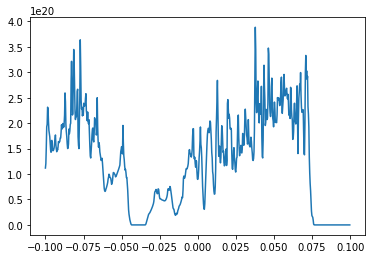

In [7]:
plt.plot(dos.dos_energies.to(units.hartree).m, dos.dos_values[0])

In [8]:
next(system for system in run.section_system if system.is_representative).chemical_composition_bulk_reduced

'Al6Si40Sr8'